In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load Data
dev_datas = pd.read_csv("/kaggle/input/test-and-train/Dev_data_to_be_shared 3/Dev_data_to_be_shared.csv")
val_datas= pd.read_csv("/kaggle/input/test-and-train/validation_data_to_be_shared 3/validation_data_to_be_shared.csv")

print("Development Data Shape:", dev_datas.shape)
# print("Validation Data Shape:", val_data.shape)


In [ ]:
dev_datas

In [ ]:
# Replace missing values (NaN) with the mean of each column
cdf = dev_datas.apply(lambda x: x.fillna(x.median()), axis=0)

# Display the cleaned data with missing values replaced
print(cdf.head())


In [ ]:
cdf

In [ ]:
y=dev_datas['bad_flag']

In [ ]:
y

In [ ]:
# List of columns to remove
columns_to_remove = ['transaction_attribute_244', 'transaction_attribute_402', 'transaction_attribute_476', 
                     'transaction_attribute_296', 'transaction_attribute_268', 'bureau_210', 'onus_attribute_22', 
                     'transaction_attribute_521', 'bureau_enquiry_21', 'bureau_enquiry_31', 'onus_attribute_12', 
                     'onus_attribute_32', 'transaction_attribute_275', 'transaction_attribute_164', 'bureau_214', 
                     'onus_attribute_44', 'bureau_280', 'bureau_240', 'transaction_attribute_230', 'transaction_attribute_125',
                     'transaction_attribute_236', 'transaction_attribute_250', 'bureau_enquiry_39', 'bureau_257',
                     'transaction_attribute_246', 'transaction_attribute_71', 'transaction_attribute_401', 
                     'transaction_attribute_266', 'transaction_attribute_594', 'bureau_223', 'onus_attribute_18', 
                     'transaction_attribute_363', 'transaction_attribute_202', 'transaction_attribute_311', 
                     'transaction_attribute_338', 'transaction_attribute_293', 'transaction_attribute_13', 'bureau_137',
                     'bureau_265', 'bureau_323', 'transaction_attribute_299', 'bureau_415', 'bureau_200', 'bureau_310',
                     'transaction_attribute_446', 'transaction_attribute_391', 'bureau_313', 'transaction_attribute_100', 
                     'transaction_attribute_482', 'transaction_attribute_248', 'bureau_104', 'transaction_attribute_61',
                     'transaction_attribute_253', 'transaction_attribute_365', 'transaction_attribute_347', 
                     'bureau_18', 'transaction_attribute_80', 'onus_attribute_36', 'bureau_324', 'bureau_226',
                     'transaction_attribute_234', 'bureau_267', 'bureau_249', 'onus_attribute_31', 'bureau_344',
                     'transaction_attribute_346', 'bureau_255', 'bureau_260', 'bureau_20', 'transaction_attribute_287', 
                     'transaction_attribute_485', 'bureau_15', 'bureau_290', 'bureau_228', 'bureau_266', 'transaction_attribute_257',
                     'transaction_attribute_336', 'bureau_435', 'transaction_attribute_103', 'transaction_attribute_120', 
                     'bureau_98', 'transaction_attribute_304', 'transaction_attribute_421', 'transaction_attribute_271',
                     'bureau_46', 'transaction_attribute_283', 'transaction_attribute_263', 'transaction_attribute_320',
                     'transaction_attribute_20', 'bureau_274', 'transaction_attribute_540', 'transaction_attribute_344',
                     'bureau_397', 'transaction_attribute_262', 'transaction_attribute_314', 'transaction_attribute_242', 
                     'transaction_attribute_310', 'bureau_440', 'bureau_6', 'bureau_14', 'transaction_attribute_70', 
                     'transaction_attribute_332', 'onus_attribute_35', 'transaction_attribute_220', 'bureau_293', 
                     'transaction_attribute_350', 'transaction_attribute_289', 'bureau_213', 'transaction_attribute_91',
                     'transaction_attribute_613', 'transaction_attribute_254', 'transaction_attribute_511', 
                     'transaction_attribute_481', 'bureau_225', 'transaction_attribute_416', 'bureau_429', 
                     'transaction_attribute_159', 'bureau_enquiry_33', 'transaction_attribute_486', 'transaction_attribute_216',
                     'bureau_250', 'bureau_103', 'transaction_attribute_301', 'bureau_343', 'transaction_attribute_412',
                     'transaction_attribute_660', 'bureau_215', 'bureau_21', 'onus_attribute_6', 'bureau_211', 'bureau_220',
                     'bureau_49', 'transaction_attribute_85', 'bureau_319', 'transaction_attribute_115', 'bureau_125',
                     'transaction_attribute_109', 'transaction_attribute_3', 'bureau_194', 'bureau_9', 'transaction_attribute_123',
                     'transaction_attribute_111', 'bureau_227', 'transaction_attribute_322', 'transaction_attribute_313', 
                     'transaction_attribute_471', 'transaction_attribute_302', 'transaction_attribute_238', 
                     'transaction_attribute_249', 'transaction_attribute_298', 'transaction_attribute_251', 'bureau_300',
                     'transaction_attribute_74', 'transaction_attribute_295', 'transaction_attribute_241', 'bureau_446',
                     'bureau_254', 'transaction_attribute_219', 'bureau_259', 'bureau_320', 'bureau_164', 'bureau_173', 
                     'bureau_enquiry_40', 'transaction_attribute_396', 'bureau_199', 'transaction_attribute_94', 
                     'transaction_attribute_452', 'transaction_attribute_531', 'bureau_336', 'transaction_attribute_335',
                     'transaction_attribute_441', 'transaction_attribute_536', 'transaction_attribute_331', 
                     'onus_attribute_9', 'transaction_attribute_129', 'transaction_attribute_496', 'transaction_attribute_58',
                     'transaction_attribute_329', 'transaction_attribute_292', 'transaction_attribute_260', 'transaction_attribute_571',
                     'bureau_294', 'transaction_attribute_284', 'bureau_263', 'transaction_attribute_274', 'transaction_attribute_451',
                     'transaction_attribute_406', 'bureau_346', 'transaction_attribute_411', 'bureau_253', 'transaction_attribute_151',
                     'bureau_326', 'bureau_334', 'transaction_attribute_334', 'bureau_256', 'transaction_attribute_272', 
                     'bureau_418', 'bureau_105', 'bureau_enquiry_13', 'transaction_attribute_361', 'transaction_attribute_431',
                     'transaction_attribute_522', 'bureau_405', 'bureau_45', 'bureau_8', 'transaction_attribute_101', 
                     'onus_attribute_10', 'transaction_attribute_280', 'bureau_318', 'transaction_attribute_9', 
                     'bureau_209', 'transaction_attribute_49', 'transaction_attribute_235', 'transaction_attribute_64', 
                     'bureau_217', 'transaction_attribute_102', 'onus_attribute_1', 'transaction_attribute_578', 
                     'transaction_attribute_579', 'transaction_attribute_556', 'transaction_attribute_19', 'transaction_attribute_276', 
                     'bureau_216', 'transaction_attribute_389', 'transaction_attribute_228', 'transaction_attribute_343',
                     'transaction_attribute_516', 'transaction_attribute_265', 'transaction_attribute_239', 'transaction_attribute_305',
                     'transaction_attribute_81', 'bureau_244', 'transaction_attribute_133', 'transaction_attribute_259', 
                     'bureau_234', 'transaction_attribute_247', 'bureau_enquiry_35', 'transaction_attribute_376', 
                     'transaction_attribute_112', 'transaction_attribute_371', 'bureau_316', 'bureau_258', 
                     'transaction_attribute_256', 'bureau_317', 'transaction_attribute_319', 'bureau_115', 'transaction_attribute_337',
                     'bureau_309', 'transaction_attribute_366', 'transaction_attribute_517', 'bureau_348', 'transaction_attribute_381',
                     'bureau_51', 'transaction_attribute_326', 'bureau_44', 'transaction_attribute_222', 'transaction_attribute_307',
                     'transaction_attribute_444', 'transaction_attribute_436', 'transaction_attribute_574', 'transaction_attribute_466',
                     'bureau_enquiry_29', 'transaction_attribute_277', 'transaction_attribute_506', 'transaction_attribute_278',
                     'onus_attribute_17', 'bureau_106', 'transaction_attribute_245', 'transaction_attribute_281',
                     'transaction_attribute_386', 'transaction_attribute_484', 'transaction_attribute_183', 'bureau_206',
                     'transaction_attribute_232', 'transaction_attribute_316', 'transaction_attribute_515', 'bureau_95',
                     'onus_attribute_43', 'transaction_attribute_79', 'bureau_264', 'onus_attribute_20', 'transaction_attribute_426',
                     'transaction_attribute_28', 'transaction_attribute_546', 'bureau_187', 'bureau_417', 'transaction_attribute_341',
                     'transaction_attribute_440', 'bureau_268', 'transaction_attribute_323', 'bureau_208', 'transaction_attribute_456',
                     'bureau_enquiry_41', 'bureau_304', 'bureau_22', 'bureau_270', 'onus_attribute_11', 'bureau_439', 
                     'transaction_attribute_226', 'bureau_205', 'bureau_11', 'transaction_attribute_461', 'transaction_attribute_325',
                     'bureau_30', 'bureau_enquiry_32', 'bureau_31', 'transaction_attribute_285', 'bureau_85', 'transaction_attribute_290',
                     'transaction_attribute_518', 'onus_attribute_33', 'bureau_33', 'bureau_92', 'transaction_attribute_317',
                     'transaction_attribute_349', 'transaction_attribute_300', 'onus_attribute_21', 'bureau_407', 
                     'transaction_attribute_321', 'transaction_attribute_364', 'bureau_75', 'transaction_attribute_501', 
                     'bureau_13', 'bureau_219', 'transaction_attribute_659', 'bureau_204', 'bureau_102', 'bureau_126', 
                     'bureau_2', 'bureau_251', 'transaction_attribute_243', 'bureau_17', 'bureau_330', 'transaction_attribute_328',
                     'bureau_314', 'transaction_attribute_286', 'transaction_attribute_507', 'bureau_enquiry_11', 
                     'transaction_attribute_8', 'bureau_333', 'onus_attribute_13', 'transaction_attribute_308', 'bureau_218',
                     'bureau_enquiry_1', 'transaction_attribute_294', 'bureau_224', 'transaction_attribute_37', 'transaction_attribute_519',
                     'transaction_attribute_362', 'transaction_attribute_541', 'transaction_attribute_56', 'bureau_340', 
                     'transaction_attribute_526', 'transaction_attribute_7', 'bureau_207', 'transaction_attribute_229', 
                     'transaction_attribute_1', 'transaction_attribute_340', 'onus_attribute_47', 'transaction_attribute_144', 
                     'transaction_attribute_555', 'transaction_attribute_269', 'bureau_284', 'onus_attribute_16']

# Remove the columns from the dataframe
dev_data_cleaned = dev_datas.drop(columns=columns_to_remove)

# Verify the removal
print(f"Shape after removal: {dev_data_cleaned.shape}")
# Replace missing values (NaN) with the mean of each column
cleaned_data_filled = dev_data_cleaned.apply(lambda x: x.fillna(x.median()), axis=0)

# Display the cleaned data with missing values replaced
print(cleaned_data_filled.head())
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns of dev_data_cleaned
# Assuming the data is numerical and does not contain non-numeric columns such as 'labels'
normalized_data = scaler.fit_transform(cleaned_data_filled)

# Convert the normalized data back into a DataFrame with the same column names
normalized_df = pd.DataFrame(normalized_data, columns=cleaned_data_filled.columns)

# Display the first few rows of the normalized dataframe
print(normalized_df.head())
# Replace 'account_number' and 'bad_flag' columns in df2 with those from df1
df2['account_number'] = dev_data_cleaned['account_number']
df2['bad_flag'] = dev_data_cleaned['bad_flag']

# Display the updated df2
print(df2.head())
# Replace 'account_number' and 'bad_flag' columns in df2 with those from df1
df2['account_number'] = dev_data_cleaned['account_number']
df2['bad_flag'] = dev_data_cleaned['bad_flag']

# Display the updated df2
print(df2.head())
# Step 1: Calculate the number of missing values in each column
missing_values = df2.isna().sum()

# Step 2: Sort the columns based on the number of missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

# Step 3: Display columns with the highest missing values
print("Columns with the highest missing values:")
print(sorted_missing_values)
df10=df2.drop(columns='bureau_436')
df11=df10.drop(columns='bureau_447')
X = df11.drop(columns=['bad_flag', 'account_number'])  # Drop the target and non-feature columns
y = df11['bad_flag']  # Target column


In [ ]:
dev_data_cleaned

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = cdf.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)


In [ ]:
# Replace missing values (NaN) with the mean of each column
cleaned_data_filled = dev_data_cleaned.apply(lambda x: x.fillna(x.median()), axis=0)

# Display the cleaned data with missing values replaced
print(cleaned_data_filled.head())


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = cleaned_data_filled.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns of dev_data_cleaned
# Assuming the data is numerical and does not contain non-numeric columns such as 'labels'
normalized_data = scaler.fit_transform(cleaned_data_filled)

# Convert the normalized data back into a DataFrame with the same column names
normalized_df = pd.DataFrame(normalized_data, columns=cleaned_data_filled.columns)

# Display the first few rows of the normalized dataframe
print(normalized_df.head())


In [ ]:
df2=normalized_df

In [ ]:
df6=normalized_df

In [ ]:
df6

###### 

In [ ]:
df2

In [ ]:
# Replace 'account_number' and 'bad_flag' columns in df2 with those from df1
df2['account_number'] = dev_data_cleaned['account_number']
df2['bad_flag'] = dev_data_cleaned['bad_flag']

# Display the updated df2
print(df2.head())


In [ ]:
df2

In [ ]:
# Step 1: Calculate the number of missing values in each column
missing_values = df2.isna().sum()

# Step 2: Sort the columns based on the number of missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

# Step 3: Display columns with the highest missing values
print("Columns with the highest missing values:")
print(sorted_missing_values)


In [ ]:
df10=df2.drop(columns='bureau_436')
df11=df10.drop(columns='bureau_447')

In [ ]:
df11

,account_number,bad_flag,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,1,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
1,2,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684,-0.161045,-1.710398,-0.067676
2,3,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089,-0.161045,-0.083971,-0.067676
3,4,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091,-0.161045,-0.083971,-0.067676
4,5,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
96802,96803,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684,-0.161045,-0.083971,-0.067676
96803,96804,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545,-0.161045,-0.083971,-0.067676
96804,96805,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089,-0.161045,-0.083971,-0.067676


In [ ]:
X = df11.drop(columns=['bad_flag', 'account_number'])  # Drop the target and non-feature columns
y = df11['bad_flag']  # Target column


In [ ]:
X.isnull().sum().sum()

In [ ]:
# df4 is the less wala df11 is all

In [50]:
X

,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
1,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,0.877294,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684,-0.161045,-1.710398,-0.067676
2,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089,-0.161045,-0.083971,-0.067676
3,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091,-0.161045,-0.083971,-0.067676
4,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
96802,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684,-0.161045,-0.083971,-0.067676
96803,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545,-0.161045,-0.083971,-0.067676
96804,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089,-0.161045,-0.083971,-0.067676


In [59]:
X

,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
1,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,0.877294,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684,-0.161045,-1.710398,-0.067676
2,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089,-0.161045,-0.083971,-0.067676
3,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091,-0.161045,-0.083971,-0.067676
4,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
96802,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684,-0.161045,-0.083971,-0.067676
96803,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545,-0.161045,-0.083971,-0.067676
96804,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,-0.054505,-0.062019,...,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089,-0.161045,-0.083971,-0.067676


GPU is available for training.
Class Weights: {0: 0.5, 1: 150}
Epoch 1/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5052 - loss: 3.2180 - val_accuracy: 0.1341 - val_loss: 10.9784
Epoch 2/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5983 - loss: 1.3063 - val_accuracy: 0.3524 - val_loss: 9.0415
Epoch 3/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6179 - loss: 1.1615 - val_accuracy: 0.3857 - val_loss: 6.7644
Epoch 4/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6356 - loss: 1.0753 - val_accuracy: 0.3096 - val_loss: 4.1494
Epoch 5/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6412 - loss: 1.0345 - val_accuracy: 0.4192 - val_loss: 4.0646
Epoch 6/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6542 - loss: 0.9704 - val_accuracy: 0.2690 - val_loss: 3.9168
Epoch 7/20
4772/4772 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6632 - loss: 0.9065 - val_accuracy: 0.4705 - val_loss: 2.7609
Epoch 8/20
4772/4772 ━━━━

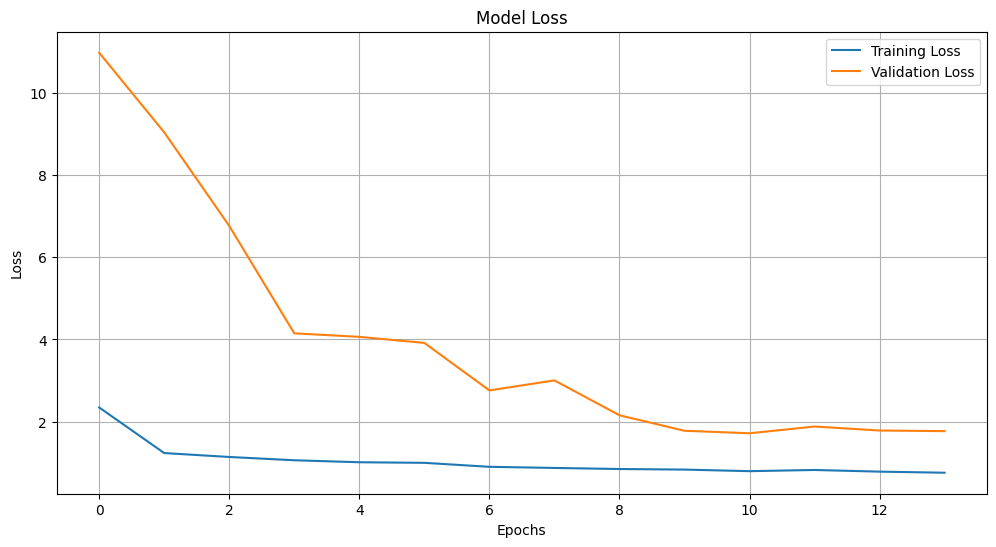

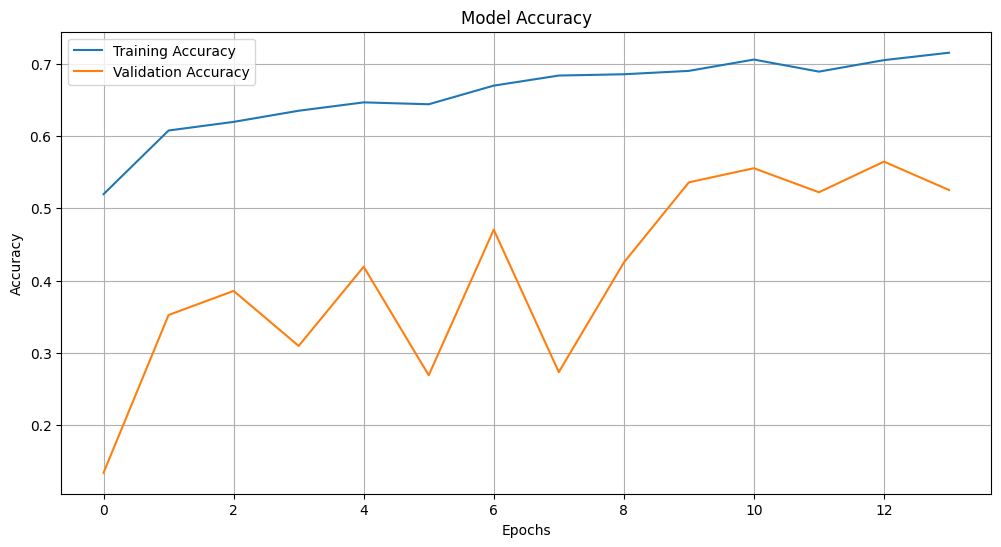

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available for training.")
else:
    print("GPU not found. Training will use the CPU.")

# Assuming `X` and `y` are already defined in the dataset
# Convert y to NumPy array for compatibility
y = np.array(y)

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Missing Values (if necessary)
X_train = pd.DataFrame(X_train).fillna(X_train.mean()).values
X_test = pd.DataFrame(X_test).fillna(X_train.mean()).values

# Step 3: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scale resampled data
X_test_scaled = scaler.transform(X_test)  # Scale test data

# Step 5: Compute Class Weights
unique_classes = np.unique(y_train_resampled)  # Use resampled labels for class weights
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train_resampled)
class_weight_dict = {0: 0.5, 1: 150}

print("Class Weights:", class_weight_dict)

# Step 6: Define the FCC Model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer for fully connected model
    Dense(128, activation='relu'),  # First fully connected layer
    Dropout(0.3),
    Dense(64, activation='relu'),   # Second fully connected layer
    Dropout(0.3),
    Dense(4, activation='relu'),   # Third fully connected layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 7: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train_scaled,
    y_train_resampled,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight_dict,  # Pass class weights
    callbacks=[early_stopping]
)

# Step 9: Evaluate the Model
y_pred = model.predict(X_test_scaled).round()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE  # Import SMOTE
# import tensorflow as tf

# # Check if GPU is available
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available for training.")
# else:
#     print("GPU not found. Training will use the CPU.")

# # Assuming `X` and `y` are already defined in the dataset
# # Convert y to NumPy array for compatibility
# y = np.array(y)

# # Step 1: Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 2: Handle Missing Values (if necessary)
# X_train = pd.DataFrame(X_train).fillna(X_train.mean()).values
# X_test = pd.DataFrame(X_test).fillna(X_train.mean()).values

# # Step 3: Apply SMOTE to the training data to handle class imbalance
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Step 4: Standardize the Data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scale resampled data
# X_test_scaled = scaler.transform(X_test)  # Scale test data

# # Step 5: Compute Class Weights
# unique_classes = np.unique(y_train_resampled)  # Use resampled labels for class weights
# class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train_resampled)
# class_weight_dict = {0: 0.5, 1: 300}

# print("Class Weights:", class_weight_dict)

# # Step 6: Define the FCC Model
# model = Sequential([
#     Input(shape=(X_train_scaled.shape[1],)),  # Input layer for fully connected model
#     Dense(128, activation='relu'),  # First fully connected layer
#     Dropout(0.3),
#     Dense(64, activation='relu'),   # Second fully connected layer
#     Dropout(0.3),
#     Dense(32, activation='relu'),   # Third fully connected layer
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Step 7: Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# # Step 8: Train the Model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = model.fit(
#     X_train_scaled,
#     y_train_resampled,
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_test_scaled, y_test),
#     class_weight=class_weight_dict,  # Pass class weights
#     callbacks=[early_stopping]
# )

# # Step 9: Evaluate the Model
# y_pred = model.predict(X_test_scaled).round()

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Step 10: Plot Training History
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()


Class Weights: {0: 0.5, 1: 35.5}
Accuracy: 0.2812
Precision: 0.0188
F1 Score: 0.0369

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.43     19088
           1       0.02      0.97      0.04       274

    accuracy                           0.28     19362
   macro avg       0.51      0.62      0.23     19362
weighted avg       0.98      0.28      0.42     19362



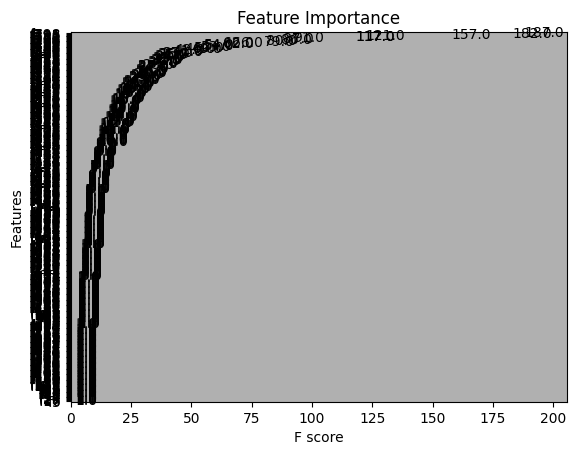

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE
import xgboost as xgb

# Assuming `X` and `y` are already defined in the dataset
# Convert y to NumPy array for compatibility
y = np.array(y)

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Missing Values (if necessary)
X_train = pd.DataFrame(X_train).fillna(X_train.mean()).values
X_test = pd.DataFrame(X_test).fillna(X_train.mean()).values

# Step 3: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scale resampled data
X_test_scaled = scaler.transform(X_test)  # Scale test data

# Step 5: Compute Class Weights (not used directly for XGBoost but kept for reference)
unique_classes = np.unique(y_train_resampled)  # Use resampled labels for class weights
class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train_resampled)
class_weight_dict = {0: 0.5, 1: 35.5}

print("Class Weights:", class_weight_dict)

# Step 6: Train XGBoost Model with More Penalty for True Label (class 1)
# Setting `scale_pos_weight` to a higher value gives more weight to the positive class (class `1`)
# This will penalize the model more for misclassifying the true label (class `1`)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=class_weight_dict[1],  # Apply penalty to class 1
    eval_metric='logloss',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Step 7: Train the Model
model.fit(X_train_scaled, y_train_resampled)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot Feature Importance (Optional)
xgb.plot_importance(model, importance_type='weight', title='Feature Importance', height=0.5)
plt.show()


In [60]:
import pandas as pd

# Assuming X is a pandas DataFrame
# Example columns (modify based on your actual column names in X)
# X = pd.DataFrame(...) 

# Splitting X into the four parts based on the column prefixes

# On Us Attributes: Columns starting with "onus_attributes"
onus_attributes = X.filter(regex='^onus_attributes')

# Transaction Level Attributes: Columns starting with "transaction_attribute"
transaction_attributes = X.filter(regex='^transaction_attribute')

# Bureau Tradeline Level Attributes: Columns starting with "bureau"
bureau = X.filter(regex='^bureau')

# Bureau Enquiry Level Attributes: Columns starting with "bureau_enquiry"
bureau_enquiry = X.filter(regex='^bureau_enquiry')

# Displaying the shapes of each part to confirm
print(f"On Us Attributes shape: {onus_attributes.shape}")
print(f"Transaction Attributes shape: {transaction_attributes.shape}")
print(f"Bureau Tradeline Attributes shape: {bureau.shape}")
print(f"Bureau Enquiry Attributes shape: {bureau_enquiry.shape}")


On Us Attributes shape: (96806, 0)
Transaction Attributes shape: (96806, 457)
Bureau Tradeline Attributes shape: (96806, 364)
Bureau Enquiry Attributes shape: (96806, 38)


In [75]:
df11["bad_flag"]

0        0
1        0
2        0
3        0
4        0
        ..
96801    0
96802    0
96803    0
96804    0
96805    0
Name: bad_flag, Length: 96806, dtype: int64

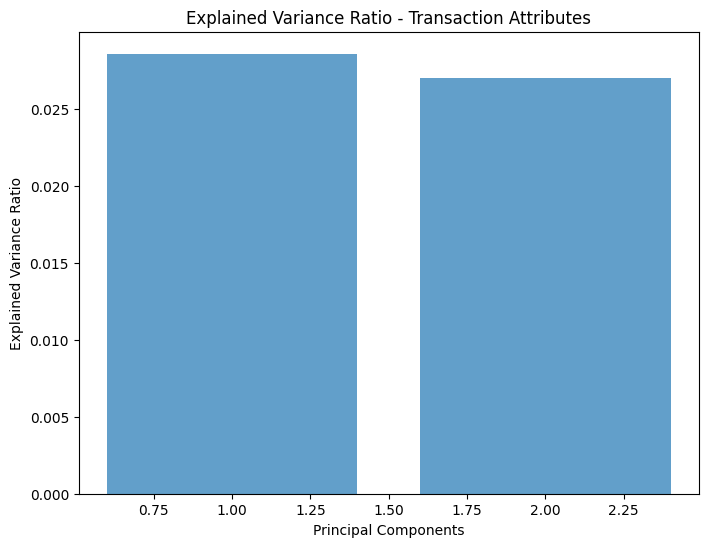

<ipython-input-93-212ac1f3f270>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)  # Create a colormap with only 2 colors


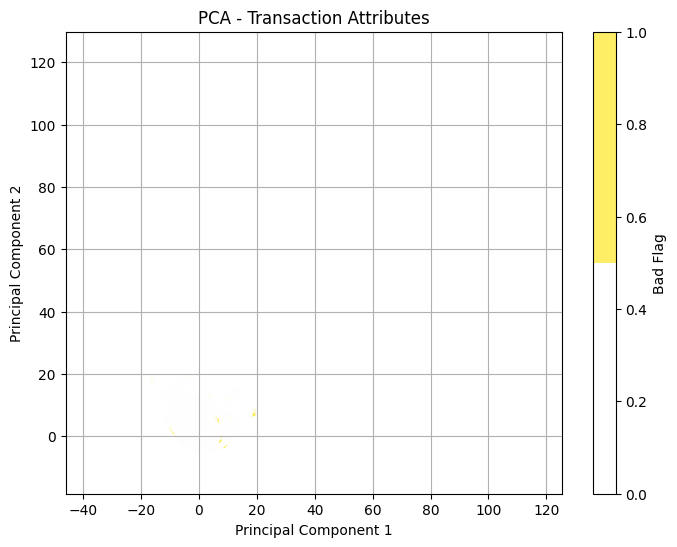

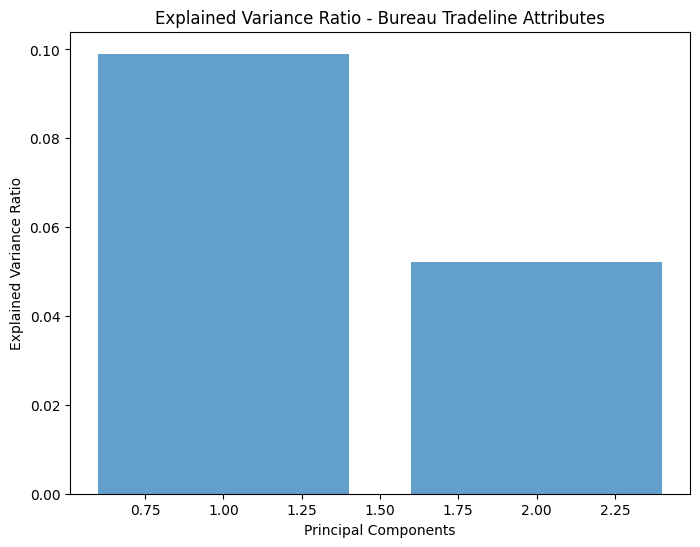

<ipython-input-93-212ac1f3f270>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)  # Create a colormap with only 2 colors


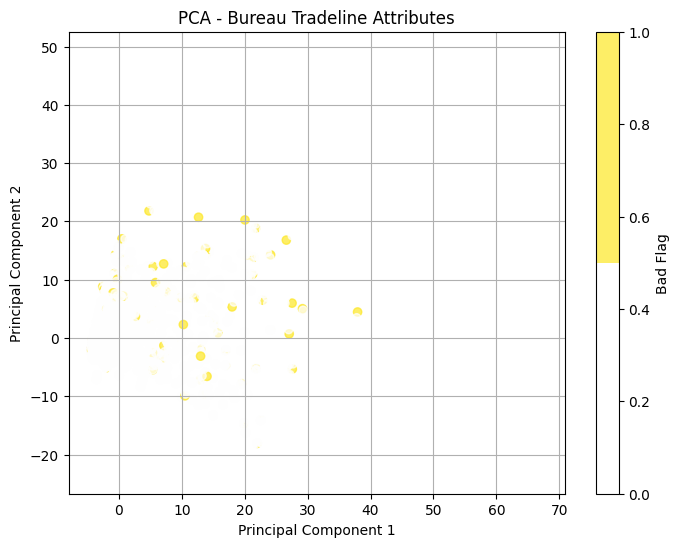

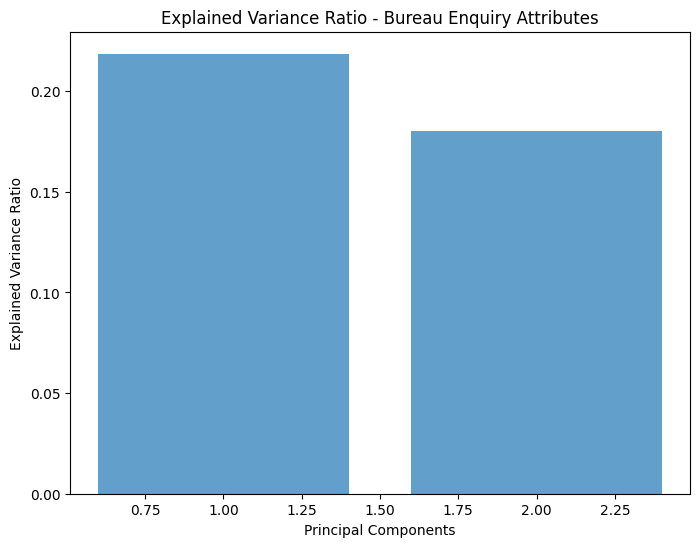

<ipython-input-93-212ac1f3f270>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)  # Create a colormap with only 2 colors


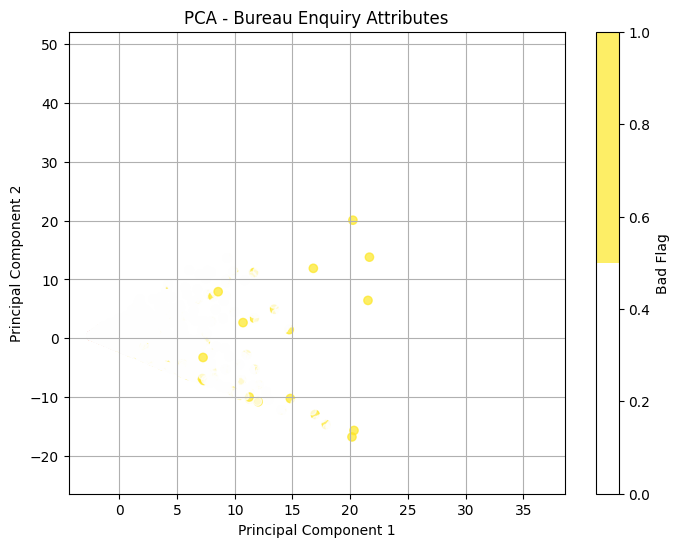

In [93]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Modify the apply_pca_and_plot_with_color function
def apply_pca_and_plot_with_color(data, bad_flag, n_components=2, name="Dataset"):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_scaled)
    
    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance Ratio - {name}')
    plt.show()

    # Create a custom color map where '0' (good) is white, and '1' (bad) gets a color
    cmap = plt.cm.get_cmap('viridis', 2)  # Create a colormap with only 2 colors
    cmap = cmap(np.linspace(0, 1, 2))  # Get the colormap with two colors
    cmap[0] = [1, 1, 1, 1]  # Set color for label '0' (good_flag) to white
    
    # Scatter Plot with color defined by 'bad_flag'
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=bad_flag, cmap=plt.cm.colors.ListedColormap(cmap), alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - {name}')
    plt.colorbar(label='Bad Flag')
    plt.grid(True)
    plt.show()

    # Return PCA result for further use if needed
    return pca_result, pca

# Assuming 'bad_flag' for each dataset and calling the function for each
transaction_bad_flag = df11['bad_flag']  # Assuming df11 has 'bad_flag' column
bureau_bad_flag = df11['bad_flag']
bureau_enquiry_bad_flag = df11['bad_flag']

datasets = {
    "Transaction Attributes": transaction_attributes.drop(columns=['bad_flag']),
    "Bureau Tradeline Attributes": bureau.drop(columns=['bad_flag']),
    "Bureau Enquiry Attributes": bureau_enquiry.drop(columns=['bad_flag']),
}

for name, data in datasets.items():
    if name == "Transaction Attributes":
        apply_pca_and_plot_with_color(data, transaction_bad_flag, n_components=2, name=name)
    elif name == "Bureau Tradeline Attributes":
        apply_pca_and_plot_with_color(data, bureau_bad_flag, n_components=2, name=name)
    elif name == "Bureau Enquiry Attributes":
        apply_pca_and_plot_with_color(data, bureau_enquiry_bad_flag, n_components=2, name=name)


In [94]:
bureau_bad_flag = df11['bad_flag']
bureau_enquiry_bad_flag = df11['bad_flag']

In [160]:
df11

,account_number,bad_flag,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,1,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
1,2,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684,-0.161045,-1.710398,-0.067676
2,3,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089,-0.161045,-0.083971,-0.067676
3,4,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091,-0.161045,-0.083971,-0.067676
4,5,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593,-0.161045,-0.083971,-0.067676
96802,96803,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684,-0.161045,-0.083971,-0.067676
96803,96804,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545,-0.161045,-0.083971,-0.067676
96804,96805,0,-0.015918,-0.021001,-0.041904,-0.022908,-0.075271,-0.130409,-0.079112,-0.107041,...,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089,-0.161045,-0.083971,-0.067676


In [159]:
import numpy as np
import pandas as pd

# Assuming 'df11' contains the bad_flag column and you're using it for both flags
bureau_bad_flag = df11['bad_flag']
bureau_enquiry_bad_flag = df11['bad_flag']

# Combine the two 'bad_flag' series
combined_bad_flag = np.concatenate([bureau_bad_flag.values, bureau_enquiry_bad_flag.values])

# If you have corresponding datasets for each flag
bureau_data_combined = pd.concat([bureau, bureau_enquiry], axis=0)

# You now have the combined dataset and the combined labels
# Proceed with training a classifier or further analysis using 'combined_bad_flag' as the target variable

print(f"Combined bad_flag shape: {combined_bad_flag.shape}")
print(f"Combined dataset shape: {bureau_data_combined.shape}")


Combined bad_flag shape: (193612,)
Combined dataset shape: (83584, 364)


In [162]:
# Store column names in an array (list)
column_names_array = bureau_data_combined.columns.tolist()

# Print the array
print(column_names_array)


['bureau_1', 'bureau_3', 'bureau_4', 'bureau_5', 'bureau_7', 'bureau_10', 'bureau_12', 'bureau_16', 'bureau_19', 'bureau_23', 'bureau_24', 'bureau_25', 'bureau_26', 'bureau_27', 'bureau_28', 'bureau_29', 'bureau_32', 'bureau_34', 'bureau_35', 'bureau_36', 'bureau_37', 'bureau_38', 'bureau_39', 'bureau_40', 'bureau_41', 'bureau_42', 'bureau_43', 'bureau_47', 'bureau_48', 'bureau_50', 'bureau_52', 'bureau_53', 'bureau_54', 'bureau_55', 'bureau_56', 'bureau_57', 'bureau_58', 'bureau_59', 'bureau_60', 'bureau_61', 'bureau_62', 'bureau_63', 'bureau_64', 'bureau_65', 'bureau_66', 'bureau_67', 'bureau_68', 'bureau_69', 'bureau_70', 'bureau_71', 'bureau_72', 'bureau_73', 'bureau_74', 'bureau_76', 'bureau_77', 'bureau_78', 'bureau_79', 'bureau_80', 'bureau_81', 'bureau_82', 'bureau_83', 'bureau_84', 'bureau_86', 'bureau_87', 'bureau_88', 'bureau_89', 'bureau_90', 'bureau_91', 'bureau_93', 'bureau_94', 'bureau_96', 'bureau_97', 'bureau_99', 'bureau_100', 'bureau_101', 'bureau_107', 'bureau_108',

In [179]:
combined_features["bad_flag"]
combined_features.drop(columns="bad_flag")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,bureau_1,bureau_3,bureau_4,bureau_5,bureau_7,bureau_10,bureau_12,bureau_16,bureau_19,bureau_23,...,bureau_enquiry_38,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,-0.389597,-0.421665,0.0,-0.555591,2.707484,-0.551805,0.687565,0.0,1.777192,-0.345107,...,-0.249512,-0.552350,-0.750959,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593
1,-0.389597,-0.421665,0.0,-0.555591,0.193912,5.273611,1.565136,0.0,0.940806,-0.345107,...,-0.249512,0.366400,-0.684393,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684
2,-0.389597,-0.421665,0.0,-0.555591,-0.720115,-0.551805,-0.892063,0.0,-0.313772,-0.345107,...,-0.249512,-0.552350,-0.218428,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089
3,-0.389597,-0.421665,0.0,-0.555591,0.650925,1.301737,0.863079,0.0,0.522613,-0.345107,...,-0.249512,-0.552350,1.578864,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091
4,0.635109,3.818352,0.0,-0.555591,2.935991,0.772153,0.775322,0.0,0.104421,-0.345107,...,-0.249512,-0.552350,-0.884092,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.249512,-0.552350,-0.617826,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593
96802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.249512,-0.552350,-0.617826,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684
96803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.249512,-0.552350,1.512298,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545
96804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.993852,0.825775,-0.085295,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38149
           1       1.00      1.00      1.00       574

    accuracy                           1.00     38723
   macro avg       1.00      1.00      1.00     38723
weighted avg       1.00      1.00      1.00     38723



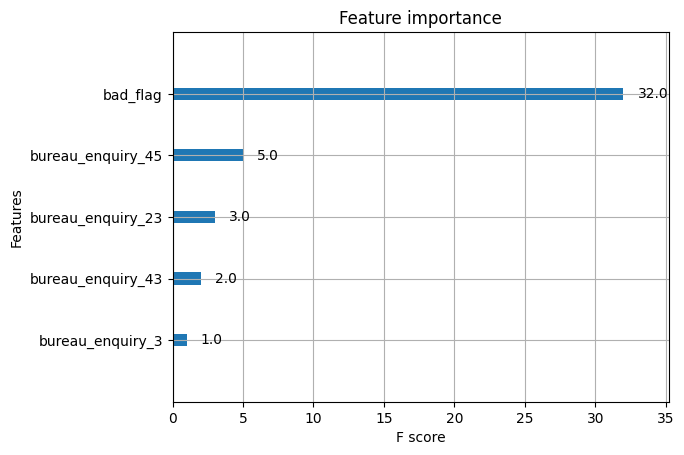

In [96]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming the combined bad_flag and combined dataset are ready as discussed before

# Combine the features (datasets)
combined_features = pd.concat([bureau, bureau_enquiry], axis=0)

# Combine the labels (bad_flag)
combined_labels = np.concatenate([bureau_bad_flag.values, bureau_enquiry_bad_flag.values])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, combined_labels, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can also plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()


In [100]:
import numpy as np

# Assuming y_pred is your predicted output from the model
count_ones = np.sum(y_pred == 1)

print("Number of 1's in predictions:", count_ones)


Number of 1's in predictions: 574


In [101]:
hj=pd.read_csv("/kaggle/input/test-and-train/validation_data_to_be_shared 3/validation_data_to_be_shared.csv")

In [102]:
hj

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,141788,164000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
41788,141789,68000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0
41789,141790,155000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
41790,141791,99000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
bureau_enquiry

,bureau_enquiry_2,bureau_enquiry_3,bureau_enquiry_4,bureau_enquiry_5,bureau_enquiry_6,bureau_enquiry_7,bureau_enquiry_8,bureau_enquiry_9,bureau_enquiry_10,bureau_enquiry_12,...,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,bad_flag
0,-0.234342,-0.637770,-0.119822,-0.325757,-0.156739,0.0,-0.086834,-0.067388,-0.558503,-0.319942,...,-0.552350,-0.750959,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,0
1,4.045982,0.278464,-0.119822,-0.325757,-0.156739,0.0,-0.086834,22.350491,0.883538,2.392884,...,0.366400,-0.684393,-0.331338,-0.430484,-0.364232,0.0,-0.312822,5.368205,-0.552684,0
2,-0.234342,-0.637770,-0.119822,-0.325757,-0.156739,0.0,-0.086834,-0.067388,-0.558503,-0.319942,...,-0.552350,-0.218428,-0.331338,-0.260951,-0.364232,0.0,-0.312822,-0.118223,0.032089,0
3,-0.234342,0.736581,-0.119822,0.889005,-0.156739,0.0,-0.086834,-0.067388,0.883538,-0.319942,...,-0.552350,1.578864,-0.331338,0.417181,-0.364232,0.0,-0.312822,-0.118223,2.605091,0
4,-0.234342,-0.637770,-0.119822,-0.325757,-0.156739,0.0,-0.086834,-0.067388,-0.558503,-0.319942,...,-0.552350,-0.884092,-0.331338,-0.600016,-0.364232,0.0,-0.312822,-0.118223,-0.786593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,-0.234342,-0.637770,-0.119822,-0.325757,-0.156739,0.0,-0.086834,-0.067388,-0.558503,-0.319942,...,-0.552350,-0.617826,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.786593,0
96802,-0.234342,-0.179653,-0.119822,0.889005,-0.156739,0.0,-0.086834,-0.067388,-0.558503,-0.319942,...,-0.552350,-0.617826,-0.331338,-0.430484,-0.364232,0.0,-0.312822,-0.118223,-0.552684,0
96803,-0.234342,4.401518,-0.119822,3.318529,-0.156739,0.0,-0.086834,-0.067388,3.046599,-0.319942,...,-0.552350,1.512298,-0.331338,0.925780,-0.364232,0.0,-0.312822,-0.118223,1.435545,0
96804,-0.234342,0.278464,-0.119822,0.889005,-0.156739,0.0,-0.086834,-0.067388,0.162517,-0.319942,...,0.825775,-0.085295,1.873015,0.078115,-0.364232,0.0,1.381997,-0.118223,0.032089,0


In [108]:
# List of columns to remove
columns_to_remove = ['transaction_attribute_244', 'transaction_attribute_402', 'transaction_attribute_476', 
                     'transaction_attribute_296', 'transaction_attribute_268', 'bureau_210', 'onus_attribute_22', 
                     'transaction_attribute_521', 'bureau_enquiry_21', 'bureau_enquiry_31', 'onus_attribute_12', 
                     'onus_attribute_32', 'transaction_attribute_275', 'transaction_attribute_164', 'bureau_214', 
                     'onus_attribute_44', 'bureau_280', 'bureau_240', 'transaction_attribute_230', 'transaction_attribute_125',
                     'transaction_attribute_236', 'transaction_attribute_250', 'bureau_enquiry_39', 'bureau_257',
                     'transaction_attribute_246', 'transaction_attribute_71', 'transaction_attribute_401', 
                     'transaction_attribute_266', 'transaction_attribute_594', 'bureau_223', 'onus_attribute_18', 
                     'transaction_attribute_363', 'transaction_attribute_202', 'transaction_attribute_311', 
                     'transaction_attribute_338', 'transaction_attribute_293', 'transaction_attribute_13', 'bureau_137',
                     'bureau_265', 'bureau_323', 'transaction_attribute_299', 'bureau_415', 'bureau_200', 'bureau_310',
                     'transaction_attribute_446', 'transaction_attribute_391', 'bureau_313', 'transaction_attribute_100', 
                     'transaction_attribute_482', 'transaction_attribute_248', 'bureau_104', 'transaction_attribute_61',
                     'transaction_attribute_253', 'transaction_attribute_365', 'transaction_attribute_347', 
                     'bureau_18', 'transaction_attribute_80', 'onus_attribute_36', 'bureau_324', 'bureau_226',
                     'transaction_attribute_234', 'bureau_267', 'bureau_249', 'onus_attribute_31', 'bureau_344',
                     'transaction_attribute_346', 'bureau_255', 'bureau_260', 'bureau_20', 'transaction_attribute_287', 
                     'transaction_attribute_485', 'bureau_15', 'bureau_290', 'bureau_228', 'bureau_266', 'transaction_attribute_257',
                     'transaction_attribute_336', 'bureau_435', 'transaction_attribute_103', 'transaction_attribute_120', 
                     'bureau_98', 'transaction_attribute_304', 'transaction_attribute_421', 'transaction_attribute_271',
                     'bureau_46', 'transaction_attribute_283', 'transaction_attribute_263', 'transaction_attribute_320',
                     'transaction_attribute_20', 'bureau_274', 'transaction_attribute_540', 'transaction_attribute_344',
                     'bureau_397', 'transaction_attribute_262', 'transaction_attribute_314', 'transaction_attribute_242', 
                     'transaction_attribute_310', 'bureau_440', 'bureau_6', 'bureau_14', 'transaction_attribute_70', 
                     'transaction_attribute_332', 'onus_attribute_35', 'transaction_attribute_220', 'bureau_293', 
                     'transaction_attribute_350', 'transaction_attribute_289', 'bureau_213', 'transaction_attribute_91',
                     'transaction_attribute_613', 'transaction_attribute_254', 'transaction_attribute_511', 
                     'transaction_attribute_481', 'bureau_225', 'transaction_attribute_416', 'bureau_429', 
                     'transaction_attribute_159', 'bureau_enquiry_33', 'transaction_attribute_486', 'transaction_attribute_216',
                     'bureau_250', 'bureau_103', 'transaction_attribute_301', 'bureau_343', 'transaction_attribute_412',
                     'transaction_attribute_660', 'bureau_215', 'bureau_21', 'onus_attribute_6', 'bureau_211', 'bureau_220',
                     'bureau_49', 'transaction_attribute_85', 'bureau_319', 'transaction_attribute_115', 'bureau_125',
                     'transaction_attribute_109', 'transaction_attribute_3', 'bureau_194', 'bureau_9', 'transaction_attribute_123',
                     'transaction_attribute_111', 'bureau_227', 'transaction_attribute_322', 'transaction_attribute_313', 
                     'transaction_attribute_471', 'transaction_attribute_302', 'transaction_attribute_238', 
                     'transaction_attribute_249', 'transaction_attribute_298', 'transaction_attribute_251', 'bureau_300',
                     'transaction_attribute_74', 'transaction_attribute_295', 'transaction_attribute_241', 'bureau_446',
                     'bureau_254', 'transaction_attribute_219', 'bureau_259', 'bureau_320', 'bureau_164', 'bureau_173', 
                     'bureau_enquiry_40', 'transaction_attribute_396', 'bureau_199', 'transaction_attribute_94', 
                     'transaction_attribute_452', 'transaction_attribute_531', 'bureau_336', 'transaction_attribute_335',
                     'transaction_attribute_441', 'transaction_attribute_536', 'transaction_attribute_331', 
                     'onus_attribute_9', 'transaction_attribute_129', 'transaction_attribute_496', 'transaction_attribute_58',
                     'transaction_attribute_329', 'transaction_attribute_292', 'transaction_attribute_260', 'transaction_attribute_571',
                     'bureau_294', 'transaction_attribute_284', 'bureau_263', 'transaction_attribute_274', 'transaction_attribute_451',
                     'transaction_attribute_406', 'bureau_346', 'transaction_attribute_411', 'bureau_253', 'transaction_attribute_151',
                     'bureau_326', 'bureau_334', 'transaction_attribute_334', 'bureau_256', 'transaction_attribute_272', 
                     'bureau_418', 'bureau_105', 'bureau_enquiry_13', 'transaction_attribute_361', 'transaction_attribute_431',
                     'transaction_attribute_522', 'bureau_405', 'bureau_45', 'bureau_8', 'transaction_attribute_101', 
                     'onus_attribute_10', 'transaction_attribute_280', 'bureau_318', 'transaction_attribute_9', 
                     'bureau_209', 'transaction_attribute_49', 'transaction_attribute_235', 'transaction_attribute_64', 
                     'bureau_217', 'transaction_attribute_102', 'onus_attribute_1', 'transaction_attribute_578', 
                     'transaction_attribute_579', 'transaction_attribute_556', 'transaction_attribute_19', 'transaction_attribute_276', 
                     'bureau_216', 'transaction_attribute_389', 'transaction_attribute_228', 'transaction_attribute_343',
                     'transaction_attribute_516', 'transaction_attribute_265', 'transaction_attribute_239', 'transaction_attribute_305',
                     'transaction_attribute_81', 'bureau_244', 'transaction_attribute_133', 'transaction_attribute_259', 
                     'bureau_234', 'transaction_attribute_247', 'bureau_enquiry_35', 'transaction_attribute_376', 
                     'transaction_attribute_112', 'transaction_attribute_371', 'bureau_316', 'bureau_258', 
                     'transaction_attribute_256', 'bureau_317', 'transaction_attribute_319', 'bureau_115', 'transaction_attribute_337',
                     'bureau_309', 'transaction_attribute_366', 'transaction_attribute_517', 'bureau_348', 'transaction_attribute_381',
                     'bureau_51', 'transaction_attribute_326', 'bureau_44', 'transaction_attribute_222', 'transaction_attribute_307',
                     'transaction_attribute_444', 'transaction_attribute_436', 'transaction_attribute_574', 'transaction_attribute_466',
                     'bureau_enquiry_29', 'transaction_attribute_277', 'transaction_attribute_506', 'transaction_attribute_278',
                     'onus_attribute_17', 'bureau_106', 'transaction_attribute_245', 'transaction_attribute_281',
                     'transaction_attribute_386', 'transaction_attribute_484', 'transaction_attribute_183', 'bureau_206',
                     'transaction_attribute_232', 'transaction_attribute_316', 'transaction_attribute_515', 'bureau_95',
                     'onus_attribute_43', 'transaction_attribute_79', 'bureau_264', 'onus_attribute_20', 'transaction_attribute_426',
                     'transaction_attribute_28', 'transaction_attribute_546', 'bureau_187', 'bureau_417', 'transaction_attribute_341',
                     'transaction_attribute_440', 'bureau_268', 'transaction_attribute_323', 'bureau_208', 'transaction_attribute_456',
                     'bureau_enquiry_41', 'bureau_304', 'bureau_22', 'bureau_270', 'onus_attribute_11', 'bureau_439', 
                     'transaction_attribute_226', 'bureau_205', 'bureau_11', 'transaction_attribute_461', 'transaction_attribute_325',
                     'bureau_30', 'bureau_enquiry_32', 'bureau_31', 'transaction_attribute_285', 'bureau_85', 'transaction_attribute_290',
                     'transaction_attribute_518', 'onus_attribute_33', 'bureau_33', 'bureau_92', 'transaction_attribute_317',
                     'transaction_attribute_349', 'transaction_attribute_300', 'onus_attribute_21', 'bureau_407', 
                     'transaction_attribute_321', 'transaction_attribute_364', 'bureau_75', 'transaction_attribute_501', 
                     'bureau_13', 'bureau_219', 'transaction_attribute_659', 'bureau_204', 'bureau_102', 'bureau_126', 
                     'bureau_2', 'bureau_251', 'transaction_attribute_243', 'bureau_17', 'bureau_330', 'transaction_attribute_328',
                     'bureau_314', 'transaction_attribute_286', 'transaction_attribute_507', 'bureau_enquiry_11', 
                     'transaction_attribute_8', 'bureau_333', 'onus_attribute_13', 'transaction_attribute_308', 'bureau_218',
                     'bureau_enquiry_1', 'transaction_attribute_294', 'bureau_224', 'transaction_attribute_37', 'transaction_attribute_519',
                     'transaction_attribute_362', 'transaction_attribute_541', 'transaction_attribute_56', 'bureau_340', 
                     'transaction_attribute_526', 'transaction_attribute_7', 'bureau_207', 'transaction_attribute_229', 
                     'transaction_attribute_1', 'transaction_attribute_340', 'onus_attribute_47', 'transaction_attribute_144', 
                     'transaction_attribute_555', 'transaction_attribute_269', 'bureau_284', 'onus_attribute_16']

# Remove the columns from the dataframe
dev_data_cleaneds = hj.drop(columns=columns_to_remove)

# Verify the removal
print(f"Shape after removal: {dev_data_cleaneds.shape}")
# Replace missing values (NaN) with the mean of each column
cleaned_data_filleds = dev_data_cleaneds.apply(lambda x: x.fillna(x.median()), axis=0)

# Display the cleaned data with missing values replaced
print(cleaned_data_filleds.head())
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns of dev_data_cleaned
# Assuming the data is numerical and does not contain non-numeric columns such as 'labels'
normalized_datas = scaler.fit_transform(cleaned_data_filleds)

# Convert the normalized data back into a DataFrame with the same column names
normalized_dfs = pd.DataFrame(normalized_datas, columns=cleaned_data_filleds.columns)

# Display the first few rows of the normalized dataframe
print(normalized_dfs.head())



# # Replace 'account_number' and 'bad_flag' columns in df2 with those from df1

# # Display the updated df2
# print(df2.head())
# # Replace 'account_number' and 'bad_flag' columns in df2 with those from df1
# df2['account_number'] = dev_data_cleaned['account_number']
# df2['bad_flag'] = dev_data_cleaned['bad_flag']

# # Display the updated df2
# print(df2.head())
# # Step 1: Calculate the number of missing values in each column
# missing_values = df2.isna().sum()

# # Step 2: Sort the columns based on the number of missing values in descending order
# sorted_missing_values = missing_values.sort_values(ascending=False)

# # Step 3: Display columns with the highest missing values
# print("Columns with the highest missing values:")
# print(sorted_missing_values)



Shape after removal: (41792, 851)
   account_number  transaction_attribute_2  transaction_attribute_4  \
0          100001                      0.0                      0.0   
1          100002                      0.0                      0.0   
2          100003                      0.0                      0.0   
3          100004                      0.0                      0.0   
4          100005                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute_10  \
0                      0.0                      0.0                       0.0   
1                      0.0                      0.0                       0.0   
2                      0.0                      0.0                       0.0   
3                      0.0                      0.0                       0.0   
4                      0.0                      0.0                       0.0   

   transaction_attribute_11  transaction_attribute_1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:87: RuntimeWarning: invalid value encountered in less_equal
  return var <= upper_bound


   account_number  transaction_attribute_2  transaction_attribute_4  \
0       -1.732009                -0.026474                -0.021979   
1       -1.731926                -0.026474                -0.021979   
2       -1.731844                -0.026474                -0.021979   
3       -1.731761                -0.026474                -0.021979   
4       -1.731678                -0.026474                -0.021979   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute_10  \
0                -0.040639                -0.029795                 -0.061461   
1                -0.040639                -0.029795                 -0.061461   
2                -0.040639                -0.029795                 -0.061461   
3                -0.040639                -0.029795                 -0.061461   
4                -0.040639                -0.029795                 -0.061461   

   transaction_attribute_11  transaction_attribute_12  \
0                 -0.134828  

In [109]:
normalized_dfs

,account_number,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,transaction_attribute_15,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,-1.732009,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,1.094960,-0.362758,0.0,-0.309628,-0.119357,2.847127,-0.159957,-0.079533,-0.067834
1,-1.731926,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.907162,-0.159957,-0.079533,-0.067834
2,-1.731844,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,3.031872,-0.119357,0.500697,-0.159957,-0.079533,-0.067834
3,-1.731761,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.789840,-0.159957,-0.079533,-0.067834
4,-1.731678,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,-0.309628,-0.119357,1.204626,-0.159957,-1.840965,-0.067834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,1.731678,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,1.843221,-0.598929,-0.362758,0.0,-0.309628,-0.119357,0.266054,-0.159957,-0.079533,-0.067834
41788,1.731761,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,1.361122,-0.119357,1.321947,-0.159957,-0.079533,-0.067834
41789,1.731844,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.320554,-0.159957,-0.079533,-0.067834
41790,1.731926,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,-0.309628,-0.119357,-0.672519,-0.159957,-0.079533,-0.067834


In [112]:
df22=normalized_dfs
# df22['account_number'] = hj['account_number']
# df22['bad_flag'] = hj['bad_flag']

In [114]:
hj

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,141788,164000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
41788,141789,68000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0
41789,141790,155000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
41790,141791,99000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df22.isna().sum().sum()

83584

In [119]:
df100=df22.drop(columns='bureau_436')
df111=df100.drop(columns='bureau_447')

In [120]:
df111

,account_number,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,transaction_attribute_15,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,100001,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,1.094960,-0.362758,0.0,-0.309628,-0.119357,2.847127,-0.159957,-0.079533,-0.067834
1,100002,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.907162,-0.159957,-0.079533,-0.067834
2,100003,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,3.031872,-0.119357,0.500697,-0.159957,-0.079533,-0.067834
3,100004,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.789840,-0.159957,-0.079533,-0.067834
4,100005,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,-0.309628,-0.119357,1.204626,-0.159957,-1.840965,-0.067834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,141788,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,1.843221,-0.598929,-0.362758,0.0,-0.309628,-0.119357,0.266054,-0.159957,-0.079533,-0.067834
41788,141789,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,1.361122,-0.119357,1.321947,-0.159957,-0.079533,-0.067834
41789,141790,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.320554,-0.159957,-0.079533,-0.067834
41790,141791,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,-0.309628,-0.119357,-0.672519,-0.159957,-0.079533,-0.067834


In [126]:
A = df111.drop(columns=['account_number'])  # Drop the target and non-feature columns
# B = df111['bad_flag']  # Target column

In [138]:
A.isnull().sum().sum()

0

In [164]:
# Keep only the columns that are in the column_names_array in DataFrame A
A_filtered = A[column_names_array]

# Display the filtered DataFrame
print(A_filtered)


       bureau_1  bureau_3  bureau_4  bureau_5  bureau_7  bureau_10  bureau_12  \
0     -0.390020 -0.418574       0.0 -0.560921 -0.267960  -0.548945  -0.194210   
1     -0.390020  0.622307       0.0 -0.560921 -0.725727   0.491781  -0.630933   
2      2.691209 -0.418574       0.0 -0.560921  2.478643   0.231600   1.727373   
3     -0.390020 -0.418574       0.0 -0.560921 -0.725727  -0.288763  -0.980312   
4     -0.390020 -0.418574       0.0 -0.560921 -0.267960  -0.548945   0.591892   
...         ...       ...       ...       ...       ...        ...        ...   
41787  1.664133 -0.418574       0.0  0.601762 -0.496844   0.231600  -0.543589   
41788 -0.390020 -0.418574       0.0  0.601762 -0.725727  -0.288763  -0.892967   
41789 -0.390020 -0.418574       0.0  0.601762  0.418691  -0.288763   0.591892   
41790 -0.390020 -0.418574       0.0 -0.560921 -0.725727  -0.548945  -0.718278   
41791 -0.390020 -0.418574       0.0  1.764444  1.105341  -0.288763   0.242514   

       bureau_16  bureau_19

In [166]:
A_filtered.isnull().sum().sum()

0

In [169]:
prasu=A_filtered

In [170]:
prasu

,bureau_1,bureau_3,bureau_4,bureau_5,bureau_7,bureau_10,bureau_12,bureau_16,bureau_19,bureau_23,...,bureau_enquiry_38,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,-0.390020,-0.418574,0.0,-0.560921,-0.267960,-0.548945,-0.194210,0.0,-0.314479,-0.341682,...,-0.250218,-0.092176,2.384760,-0.328894,1.094960,-0.362758,0.0,-0.309628,-0.119357,2.847127
1,-0.390020,0.622307,0.0,-0.560921,-0.725727,0.491781,-0.630933,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.953688,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.907162
2,2.691209,-0.418574,0.0,-0.560921,2.478643,0.231600,1.727373,0.0,2.593656,2.169673,...,4.251337,0.360495,-0.018923,-0.328894,-0.429540,-0.362758,0.0,3.031872,-0.119357,0.500697
3,-0.390020,-0.418574,0.0,-0.560921,-0.725727,-0.288763,-0.980312,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.886919,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.789840
4,-0.390020,-0.418574,0.0,-0.560921,-0.267960,-0.548945,0.591892,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,0.982612,-0.328894,-0.260151,-0.362758,0.0,-0.309628,-0.119357,1.204626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,1.664133,-0.418574,0.0,0.601762,-0.496844,0.231600,-0.543589,0.0,0.100969,2.169673,...,-0.250218,0.360495,-0.285998,1.843221,-0.598929,-0.362758,0.0,-0.309628,-0.119357,0.266054
41788,-0.390020,-0.418574,0.0,0.601762,-0.725727,-0.288763,-0.892967,0.0,-0.314479,-0.341682,...,2.000560,-0.092176,0.581998,-0.328894,-0.260151,-0.362758,0.0,1.361122,-0.119357,1.321947
41789,-0.390020,-0.418574,0.0,0.601762,0.418691,-0.288763,0.591892,0.0,0.931865,-0.341682,...,-0.250218,-0.544848,-0.619843,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.320554
41790,-0.390020,-0.418574,0.0,-0.560921,-0.725727,-0.548945,-0.718278,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.553074,-0.328894,-0.429540,-0.362758,0.0,-0.309628,-0.119357,-0.672519


In [175]:
test_features = prasu  # Ensure test_df has the same preprocessing as the training data

# Make predictions on the test data
y_pred_test = xgb_model.predict(test_features)

# Display the predictions
print(y_pred_test)

ValueError: feature_names mismatch: ['bureau_1', 'bureau_3', 'bureau_4', 'bureau_5', 'bureau_7', 'bureau_10', 'bureau_12', 'bureau_16', 'bureau_19', 'bureau_23', 'bureau_24', 'bureau_25', 'bureau_26', 'bureau_27', 'bureau_28', 'bureau_29', 'bureau_32', 'bureau_34', 'bureau_35', 'bureau_36', 'bureau_37', 'bureau_38', 'bureau_39', 'bureau_40', 'bureau_41', 'bureau_42', 'bureau_43', 'bureau_47', 'bureau_48', 'bureau_50', 'bureau_52', 'bureau_53', 'bureau_54', 'bureau_55', 'bureau_56', 'bureau_57', 'bureau_58', 'bureau_59', 'bureau_60', 'bureau_61', 'bureau_62', 'bureau_63', 'bureau_64', 'bureau_65', 'bureau_66', 'bureau_67', 'bureau_68', 'bureau_69', 'bureau_70', 'bureau_71', 'bureau_72', 'bureau_73', 'bureau_74', 'bureau_76', 'bureau_77', 'bureau_78', 'bureau_79', 'bureau_80', 'bureau_81', 'bureau_82', 'bureau_83', 'bureau_84', 'bureau_86', 'bureau_87', 'bureau_88', 'bureau_89', 'bureau_90', 'bureau_91', 'bureau_93', 'bureau_94', 'bureau_96', 'bureau_97', 'bureau_99', 'bureau_100', 'bureau_101', 'bureau_107', 'bureau_108', 'bureau_109', 'bureau_110', 'bureau_111', 'bureau_112', 'bureau_113', 'bureau_114', 'bureau_116', 'bureau_117', 'bureau_118', 'bureau_119', 'bureau_120', 'bureau_121', 'bureau_122', 'bureau_123', 'bureau_124', 'bureau_127', 'bureau_128', 'bureau_129', 'bureau_130', 'bureau_131', 'bureau_132', 'bureau_133', 'bureau_134', 'bureau_135', 'bureau_136', 'bureau_138', 'bureau_139', 'bureau_140', 'bureau_141', 'bureau_142', 'bureau_143', 'bureau_144', 'bureau_145', 'bureau_146', 'bureau_147', 'bureau_148', 'bureau_149', 'bureau_150', 'bureau_151', 'bureau_152', 'bureau_153', 'bureau_154', 'bureau_155', 'bureau_156', 'bureau_157', 'bureau_158', 'bureau_159', 'bureau_160', 'bureau_161', 'bureau_162', 'bureau_163', 'bureau_165', 'bureau_166', 'bureau_167', 'bureau_168', 'bureau_169', 'bureau_170', 'bureau_171', 'bureau_172', 'bureau_174', 'bureau_175', 'bureau_176', 'bureau_177', 'bureau_178', 'bureau_179', 'bureau_180', 'bureau_181', 'bureau_182', 'bureau_183', 'bureau_184', 'bureau_185', 'bureau_186', 'bureau_188', 'bureau_189', 'bureau_190', 'bureau_191', 'bureau_192', 'bureau_193', 'bureau_195', 'bureau_196', 'bureau_197', 'bureau_198', 'bureau_201', 'bureau_202', 'bureau_203', 'bureau_212', 'bureau_221', 'bureau_222', 'bureau_229', 'bureau_230', 'bureau_231', 'bureau_232', 'bureau_233', 'bureau_235', 'bureau_236', 'bureau_237', 'bureau_238', 'bureau_239', 'bureau_241', 'bureau_242', 'bureau_243', 'bureau_245', 'bureau_246', 'bureau_247', 'bureau_248', 'bureau_252', 'bureau_261', 'bureau_262', 'bureau_269', 'bureau_271', 'bureau_272', 'bureau_273', 'bureau_275', 'bureau_276', 'bureau_277', 'bureau_278', 'bureau_279', 'bureau_281', 'bureau_282', 'bureau_283', 'bureau_285', 'bureau_286', 'bureau_287', 'bureau_288', 'bureau_289', 'bureau_291', 'bureau_292', 'bureau_295', 'bureau_296', 'bureau_297', 'bureau_298', 'bureau_299', 'bureau_301', 'bureau_302', 'bureau_303', 'bureau_305', 'bureau_306', 'bureau_307', 'bureau_308', 'bureau_311', 'bureau_312', 'bureau_315', 'bureau_321', 'bureau_322', 'bureau_325', 'bureau_327', 'bureau_328', 'bureau_329', 'bureau_331', 'bureau_332', 'bureau_335', 'bureau_337', 'bureau_338', 'bureau_339', 'bureau_341', 'bureau_342', 'bureau_345', 'bureau_347', 'bureau_349', 'bureau_350', 'bureau_351', 'bureau_352', 'bureau_353', 'bureau_354', 'bureau_355', 'bureau_356', 'bureau_357', 'bureau_358', 'bureau_359', 'bureau_360', 'bureau_361', 'bureau_362', 'bureau_363', 'bureau_364', 'bureau_365', 'bureau_366', 'bureau_367', 'bureau_368', 'bureau_369', 'bureau_370', 'bureau_371', 'bureau_372', 'bureau_373', 'bureau_374', 'bureau_375', 'bureau_376', 'bureau_377', 'bureau_378', 'bureau_379', 'bureau_380', 'bureau_381', 'bureau_382', 'bureau_383', 'bureau_384', 'bureau_385', 'bureau_386', 'bureau_387', 'bureau_388', 'bureau_389', 'bureau_390', 'bureau_391', 'bureau_392', 'bureau_393', 'bureau_394', 'bureau_395', 'bureau_396', 'bureau_398', 'bureau_399', 'bureau_400', 'bureau_401', 'bureau_402', 'bureau_403', 'bureau_404', 'bureau_406', 'bureau_408', 'bureau_409', 'bureau_410', 'bureau_411', 'bureau_412', 'bureau_413', 'bureau_414', 'bureau_416', 'bureau_419', 'bureau_420', 'bureau_421', 'bureau_422', 'bureau_423', 'bureau_424', 'bureau_425', 'bureau_426', 'bureau_427', 'bureau_428', 'bureau_430', 'bureau_431', 'bureau_432', 'bureau_433', 'bureau_434', 'bureau_437', 'bureau_438', 'bureau_441', 'bureau_442', 'bureau_443', 'bureau_444', 'bureau_445', 'bureau_448', 'bureau_449', 'bureau_450', 'bureau_451', 'bureau_452', 'bureau_enquiry_2', 'bureau_enquiry_3', 'bureau_enquiry_4', 'bureau_enquiry_5', 'bureau_enquiry_6', 'bureau_enquiry_7', 'bureau_enquiry_8', 'bureau_enquiry_9', 'bureau_enquiry_10', 'bureau_enquiry_12', 'bureau_enquiry_14', 'bureau_enquiry_15', 'bureau_enquiry_16', 'bureau_enquiry_17', 'bureau_enquiry_18', 'bureau_enquiry_19', 'bureau_enquiry_20', 'bureau_enquiry_22', 'bureau_enquiry_23', 'bureau_enquiry_24', 'bureau_enquiry_25', 'bureau_enquiry_26', 'bureau_enquiry_27', 'bureau_enquiry_28', 'bureau_enquiry_30', 'bureau_enquiry_34', 'bureau_enquiry_36', 'bureau_enquiry_37', 'bureau_enquiry_38', 'bureau_enquiry_42', 'bureau_enquiry_43', 'bureau_enquiry_44', 'bureau_enquiry_45', 'bureau_enquiry_46', 'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49', 'bureau_enquiry_50', 'bad_flag'] ['bureau_1', 'bureau_3', 'bureau_4', 'bureau_5', 'bureau_7', 'bureau_10', 'bureau_12', 'bureau_16', 'bureau_19', 'bureau_23', 'bureau_24', 'bureau_25', 'bureau_26', 'bureau_27', 'bureau_28', 'bureau_29', 'bureau_32', 'bureau_34', 'bureau_35', 'bureau_36', 'bureau_37', 'bureau_38', 'bureau_39', 'bureau_40', 'bureau_41', 'bureau_42', 'bureau_43', 'bureau_47', 'bureau_48', 'bureau_50', 'bureau_52', 'bureau_53', 'bureau_54', 'bureau_55', 'bureau_56', 'bureau_57', 'bureau_58', 'bureau_59', 'bureau_60', 'bureau_61', 'bureau_62', 'bureau_63', 'bureau_64', 'bureau_65', 'bureau_66', 'bureau_67', 'bureau_68', 'bureau_69', 'bureau_70', 'bureau_71', 'bureau_72', 'bureau_73', 'bureau_74', 'bureau_76', 'bureau_77', 'bureau_78', 'bureau_79', 'bureau_80', 'bureau_81', 'bureau_82', 'bureau_83', 'bureau_84', 'bureau_86', 'bureau_87', 'bureau_88', 'bureau_89', 'bureau_90', 'bureau_91', 'bureau_93', 'bureau_94', 'bureau_96', 'bureau_97', 'bureau_99', 'bureau_100', 'bureau_101', 'bureau_107', 'bureau_108', 'bureau_109', 'bureau_110', 'bureau_111', 'bureau_112', 'bureau_113', 'bureau_114', 'bureau_116', 'bureau_117', 'bureau_118', 'bureau_119', 'bureau_120', 'bureau_121', 'bureau_122', 'bureau_123', 'bureau_124', 'bureau_127', 'bureau_128', 'bureau_129', 'bureau_130', 'bureau_131', 'bureau_132', 'bureau_133', 'bureau_134', 'bureau_135', 'bureau_136', 'bureau_138', 'bureau_139', 'bureau_140', 'bureau_141', 'bureau_142', 'bureau_143', 'bureau_144', 'bureau_145', 'bureau_146', 'bureau_147', 'bureau_148', 'bureau_149', 'bureau_150', 'bureau_151', 'bureau_152', 'bureau_153', 'bureau_154', 'bureau_155', 'bureau_156', 'bureau_157', 'bureau_158', 'bureau_159', 'bureau_160', 'bureau_161', 'bureau_162', 'bureau_163', 'bureau_165', 'bureau_166', 'bureau_167', 'bureau_168', 'bureau_169', 'bureau_170', 'bureau_171', 'bureau_172', 'bureau_174', 'bureau_175', 'bureau_176', 'bureau_177', 'bureau_178', 'bureau_179', 'bureau_180', 'bureau_181', 'bureau_182', 'bureau_183', 'bureau_184', 'bureau_185', 'bureau_186', 'bureau_188', 'bureau_189', 'bureau_190', 'bureau_191', 'bureau_192', 'bureau_193', 'bureau_195', 'bureau_196', 'bureau_197', 'bureau_198', 'bureau_201', 'bureau_202', 'bureau_203', 'bureau_212', 'bureau_221', 'bureau_222', 'bureau_229', 'bureau_230', 'bureau_231', 'bureau_232', 'bureau_233', 'bureau_235', 'bureau_236', 'bureau_237', 'bureau_238', 'bureau_239', 'bureau_241', 'bureau_242', 'bureau_243', 'bureau_245', 'bureau_246', 'bureau_247', 'bureau_248', 'bureau_252', 'bureau_261', 'bureau_262', 'bureau_269', 'bureau_271', 'bureau_272', 'bureau_273', 'bureau_275', 'bureau_276', 'bureau_277', 'bureau_278', 'bureau_279', 'bureau_281', 'bureau_282', 'bureau_283', 'bureau_285', 'bureau_286', 'bureau_287', 'bureau_288', 'bureau_289', 'bureau_291', 'bureau_292', 'bureau_295', 'bureau_296', 'bureau_297', 'bureau_298', 'bureau_299', 'bureau_301', 'bureau_302', 'bureau_303', 'bureau_305', 'bureau_306', 'bureau_307', 'bureau_308', 'bureau_311', 'bureau_312', 'bureau_315', 'bureau_321', 'bureau_322', 'bureau_325', 'bureau_327', 'bureau_328', 'bureau_329', 'bureau_331', 'bureau_332', 'bureau_335', 'bureau_337', 'bureau_338', 'bureau_339', 'bureau_341', 'bureau_342', 'bureau_345', 'bureau_347', 'bureau_349', 'bureau_350', 'bureau_351', 'bureau_352', 'bureau_353', 'bureau_354', 'bureau_355', 'bureau_356', 'bureau_357', 'bureau_358', 'bureau_359', 'bureau_360', 'bureau_361', 'bureau_362', 'bureau_363', 'bureau_364', 'bureau_365', 'bureau_366', 'bureau_367', 'bureau_368', 'bureau_369', 'bureau_370', 'bureau_371', 'bureau_372', 'bureau_373', 'bureau_374', 'bureau_375', 'bureau_376', 'bureau_377', 'bureau_378', 'bureau_379', 'bureau_380', 'bureau_381', 'bureau_382', 'bureau_383', 'bureau_384', 'bureau_385', 'bureau_386', 'bureau_387', 'bureau_388', 'bureau_389', 'bureau_390', 'bureau_391', 'bureau_392', 'bureau_393', 'bureau_394', 'bureau_395', 'bureau_396', 'bureau_398', 'bureau_399', 'bureau_400', 'bureau_401', 'bureau_402', 'bureau_403', 'bureau_404', 'bureau_406', 'bureau_408', 'bureau_409', 'bureau_410', 'bureau_411', 'bureau_412', 'bureau_413', 'bureau_414', 'bureau_416', 'bureau_419', 'bureau_420', 'bureau_421', 'bureau_422', 'bureau_423', 'bureau_424', 'bureau_425', 'bureau_426', 'bureau_427', 'bureau_428', 'bureau_430', 'bureau_431', 'bureau_432', 'bureau_433', 'bureau_434', 'bureau_437', 'bureau_438', 'bureau_441', 'bureau_442', 'bureau_443', 'bureau_444', 'bureau_445', 'bureau_448', 'bureau_449', 'bureau_450', 'bureau_451', 'bureau_452', 'bureau_enquiry_2', 'bureau_enquiry_3', 'bureau_enquiry_4', 'bureau_enquiry_5', 'bureau_enquiry_6', 'bureau_enquiry_7', 'bureau_enquiry_8', 'bureau_enquiry_9', 'bureau_enquiry_10', 'bureau_enquiry_12', 'bureau_enquiry_14', 'bureau_enquiry_15', 'bureau_enquiry_16', 'bureau_enquiry_17', 'bureau_enquiry_18', 'bureau_enquiry_19', 'bureau_enquiry_20', 'bureau_enquiry_22', 'bureau_enquiry_23', 'bureau_enquiry_24', 'bureau_enquiry_25', 'bureau_enquiry_26', 'bureau_enquiry_27', 'bureau_enquiry_28', 'bureau_enquiry_30', 'bureau_enquiry_34', 'bureau_enquiry_36', 'bureau_enquiry_37', 'bureau_enquiry_38', 'bureau_enquiry_42', 'bureau_enquiry_43', 'bureau_enquiry_44', 'bureau_enquiry_45', 'bureau_enquiry_46', 'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49', 'bureau_enquiry_50']
expected bad_flag in input data

In [ ]:
# # Get predicted probabilities (for class 1)
# y_test_pred_prob = xgb_model.predict_proba(A)[:, 1]

# # Create a DataFrame for submission with account_number and predicted probabilities
# submission_prob = pd.DataFrame({
#     'account_number': hj['account_number'],  # Assuming account_number is the identifier
#     'bad_flag': y_test_pred_prob  # This will contain the probability of being class 1
# })

# # Save the submission file
# submission_prob.to_csv("submission_prob.csv", index=False)

# print("Submission file with probabilities created: submission_prob.csv")


In [139]:
import pandas as pd

# Assuming X is a pandas DataFrame
# Example columns (modify based on your actual column names in X)
# X = pd.DataFrame(...) 

# Splitting X into the four parts based on the column prefixes

# On Us Attributes: Columns starting with "onus_attributes"
# onus_attributes = A.filter(regex='^onus_attributes')

# Transaction Level Attributes: Columns starting with "transaction_attribute"
B = A.filter(regex='^transaction_attribute')

# Bureau Tradeline Level Attributes: Columns starting with "bureau"
C = A.filter(regex='^bureau')

# Bureau Enquiry Level Attributes: Columns starting with "bureau_enquiry"
D = A.filter(regex='^bureau_enquiry')

# Displaying the shapes of each part to confirm
# print(f"On Us Attributes shape: {onus_attributes.shape}")
print(f"Transaction Attributes shape: {transaction_attributes.shape}")
print(f"Bureau Tradeline Attributes shape: {bureau.shape}")
print(f"Bureau Enquiry Attributes shape: {bureau_enquiry.shape}")


On Us Attributes shape: (41792, 0)
Transaction Attributes shape: (41792, 457)
Bureau Tradeline Attributes shape: (41792, 364)
Bureau Enquiry Attributes shape: (41792, 38)


In [148]:
D.isnull().sum().sum()

0

In [149]:
# Combine the test datasets C and D
combined_test_data = pd.concat([C, D], axis=1)

# # Make probability predictions on the combined test dataset


In [157]:
dfd=combined_test_data

In [158]:
dfd

,bureau_1,bureau_3,bureau_4,bureau_5,bureau_7,bureau_10,bureau_12,bureau_16,bureau_19,bureau_23,...,bureau_enquiry_38,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,-0.390020,-0.418574,0.0,-0.560921,-0.267960,-0.548945,-0.194210,0.0,-0.314479,-0.341682,...,-0.250218,-0.092176,2.384760,-0.328894,1.094960,-0.362758,0.0,-0.309628,-0.119357,2.847127
1,-0.390020,0.622307,0.0,-0.560921,-0.725727,0.491781,-0.630933,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.953688,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.907162
2,2.691209,-0.418574,0.0,-0.560921,2.478643,0.231600,1.727373,0.0,2.593656,2.169673,...,4.251337,0.360495,-0.018923,-0.328894,-0.429540,-0.362758,0.0,3.031872,-0.119357,0.500697
3,-0.390020,-0.418574,0.0,-0.560921,-0.725727,-0.288763,-0.980312,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.886919,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.789840
4,-0.390020,-0.418574,0.0,-0.560921,-0.267960,-0.548945,0.591892,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,0.982612,-0.328894,-0.260151,-0.362758,0.0,-0.309628,-0.119357,1.204626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,1.664133,-0.418574,0.0,0.601762,-0.496844,0.231600,-0.543589,0.0,0.100969,2.169673,...,-0.250218,0.360495,-0.285998,1.843221,-0.598929,-0.362758,0.0,-0.309628,-0.119357,0.266054
41788,-0.390020,-0.418574,0.0,0.601762,-0.725727,-0.288763,-0.892967,0.0,-0.314479,-0.341682,...,2.000560,-0.092176,0.581998,-0.328894,-0.260151,-0.362758,0.0,1.361122,-0.119357,1.321947
41789,-0.390020,-0.418574,0.0,0.601762,0.418691,-0.288763,0.591892,0.0,0.931865,-0.341682,...,-0.250218,-0.544848,-0.619843,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.320554
41790,-0.390020,-0.418574,0.0,-0.560921,-0.725727,-0.548945,-0.718278,0.0,-0.729926,-0.341682,...,-0.250218,-0.544848,-0.553074,-0.328894,-0.429540,-0.362758,0.0,-0.309628,-0.119357,-0.672519


In [133]:
df111

,account_number,transaction_attribute_2,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_14,transaction_attribute_15,...,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_45,onus_attribute_46,onus_attribute_48
0,100001,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,1.094960,-0.362758,0.0,-0.309628,-0.119357,2.847127,-0.159957,-0.079533,-0.067834
1,100002,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.907162,-0.159957,-0.079533,-0.067834
2,100003,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,3.031872,-0.119357,0.500697,-0.159957,-0.079533,-0.067834
3,100004,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.789840,-0.159957,-0.079533,-0.067834
4,100005,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,-0.309628,-0.119357,1.204626,-0.159957,-1.840965,-0.067834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,141788,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,1.843221,-0.598929,-0.362758,0.0,-0.309628,-0.119357,0.266054,-0.159957,-0.079533,-0.067834
41788,141789,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.260151,-0.362758,0.0,1.361122,-0.119357,1.321947,-0.159957,-0.079533,-0.067834
41789,141790,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.598929,-0.362758,0.0,-0.309628,-0.119357,-0.320554,-0.159957,-0.079533,-0.067834
41790,141791,-0.026474,-0.021979,-0.040639,-0.029795,-0.061461,-0.134828,-0.079586,-0.103134,-0.057624,...,-0.328894,-0.429540,-0.362758,0.0,-0.309628,-0.119357,-0.672519,-0.159957,-0.079533,-0.067834


In [145]:
# # Get predicted probabilities (for class 1)


In [83]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to apply PCA and plot with color defined by 'bad_flag'
def apply_pca_and_plot_with_color(data, bad_flag, n_components=2, name="Dataset"):
    # Ensure that data has only numeric columns
    if data.empty:
        raise ValueError(f"Dataset '{name}' is empty after dropping 'bad_flag'.")
    
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_scaled)
    
    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance Ratio - {name}')
    plt.show()

    # Scatter Plot with color defined by 'bad_flag'
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=bad_flag, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - {name}')
    plt.colorbar(label='Bad Flag')
    plt.grid(True)
    plt.show()

    # Return PCA result for further use if needed
    return pca_result, pca

# Applying PCA for each dataset
datasets = {
    "On Us Attributes": onus_attributes.drop(columns=['bad_flag']),
    "Transaction Attributes": transaction_attributes.drop(columns=['bad_flag']),
    "Bureau Tradeline Attributes": bureau.drop(columns=['bad_flag']),
    "Bureau Enquiry Attributes": bureau_enquiry.drop(columns=['bad_flag']),
}

for name, data in datasets.items():
    # Ensure data is not empty and contains numeric values
    if data.select_dtypes(include=['number']).shape[1] == 0:
        print(f"Warning: Dataset '{name}' contains no numeric data after dropping 'bad_flag'. Skipping PCA for this dataset.")
    else:
        apply_pca_and_plot_with_color(data, data["bad_flag"], n_components=2, name=name)


KeyError: 'bad_flag'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to apply PCA and plot with color defined by 'bad_flag'
def apply_pca_and_plot_with_color(data, bad_flag, n_components=2, name="Dataset"):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_scaled)
    
    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance Ratio - {name}')
    plt.show()

    # Scatter Plot with color defined by 'bad_flag'
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=bad_flag, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - {name}')
    plt.colorbar(label='Bad Flag')
    plt.grid(True)
    plt.show()

    # Return PCA result for further use if needed
    return pca_result, pca

# Assuming bureau_enquiry DataFrame is available and has the 'bad_flag' column
bureau_enquiry_pca_result, bureau_enquiry_pca = apply_pca_and_plot_with_color(
    bureau_enquiry.drop(columns=['bad_flag']), 
    bureau_enquiry["bad_flag"], 
    n_components=3, 
    name="Bureau Enquiry Attributes"
)


In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to apply PCA and plot with color defined by 'bad_flag'
def apply_pca_and_plot_with_color(data, bad_flag, n_components=2, name="Dataset"):
    # Add 'bad_flag' to the dataset
    data_with_flag = data.copy()
    data_with_flag['bad_flag'] = bad_flag
    
    # Separate features and the target variable
    features = data_with_flag.drop(columns=['bad_flag'])  # Drop the 'bad_flag' column
    target = data_with_flag['bad_flag']
    
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_scaled)
    
    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance Ratio - {name}')
    plt.show()

    # Scatter Plot with color defined by 'bad_flag'
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - {name}')
    plt.colorbar(label='Bad Flag')
    plt.grid(True)
    plt.show()

    # Return PCA result for further use if needed
    return pca_result, pca

# Assuming 'bad_flag' is available for each dataset (e.g., as a Pandas Series or NumPy array)
# On Us Attributes PCA
if onus_attributes.shape[1] > 0:
    onus_pca_result, onus_pca = apply_pca_and_plot_with_color(onus_attributes, bad_flag, n_components=2, name="On Us Attributes")

# Transaction Attributes PCA
if transaction_attributes.shape[1] > 0:
    transaction_pca_result, transaction_pca = apply_pca_and_plot_with_color(transaction_attributes, bad_flag, n_components=2, name="Transaction Attributes")

# Bureau Tradeline Attributes PCA
if bureau.shape[1] > 0:
    bureau_pca_result, bureau_pca = apply_pca_and_plot_with_color(bureau, bad_flag, n_components=2, name="Bureau Tradeline Attributes")

# Bureau Enquiry Attributes PCA
if bureau_enquiry.shape[1] > 0:
    bureau_enquiry_pca_result, bureau_enquiry_pca = apply_pca_and_plot_with_color(bureau_enquiry, bad_flag, n_components=2, name="Bureau Enquiry Attributes")


NameError: name 'bad_flag' is not defined

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to apply PCA and plot with color defined by 'bad_flag'
def apply_pca_and_plot_with_color(data, bad_flag, n_components=2, name="Dataset"):
    # Standardize the data (exclude 'bad_flag' column if present)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_scaled)
    
    # Plotting explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance Ratio - {name}')
    plt.show()

    # Scatter Plot with color defined by 'bad_flag'
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=bad_flag, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA - {name}')
    plt.colorbar(label='Bad Flag')
    plt.grid(True)
    plt.show()

    # Return PCA result for further use if needed
    return pca_result, pca

# Assuming 'bad_flag' is already defined and available
# Apply PCA to the Transaction Attributes
transaction_pca_result, transaction_pca = apply_pca_and_plot_with_color(transaction_attributes, bad_flag, n_components=2, name="Transaction Attributes")

# Apply PCA to the Bureau Tradeline Attributes
bureau_pca_result, bureau_pca = apply_pca_and_plot_with_color(bureau, bad_flag, n_components=2, name="Bureau Tradeline Attributes")

# Apply PCA to the Bureau Enquiry Attributes
bureau_enquiry_pca_result, bureau_enquiry_pca = apply_pca_and_plot_with_color(bureau_enquiry, bad_flag, n_components=2, name="Bureau Enquiry Attributes")


NameError: name 'bad_flag' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Assume X and y are already defined as features and labels
# X = your_feature_data
# y = your_labels (binary: 0 or 1)

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Missing Values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 3: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Compute Class Weights for Imbalanced Data
y_train = np.array(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {int(cls): weight for cls, weight in zip(np.unique(y_train), class_weights)}
print(f"Class weights: {class_weight_dict}")

# Step 5: Define the Neural Network Model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer specifying the input shape
    Dense(128, activation='relu'),           # First hidden layer
    Dense(64, activation='relu'),            # Second hidden layer
    Dense(1, activation='sigmoid')           # Output layer for binary classification
])

# Step 6: Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model with Class Weights
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight_dict
)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test_scaled).round()

# Step 9: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 10: Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Step 10: Prepare the test set and make predictions
test_df = pd.read_csv("/kaggle/input/dataas/validation_data_to_be_shared 3/validation_data_to_be_shared.csv")

# Impute missing values in the test dataset
test_df_imputed = imputer.transform(test_df)

# Standardize the test set
test_df_imputed_scaled = scaler.transform(test_df_imputed)

# Predict probabilities using the trained model
y_pred_prob = model.predict(test_df_imputed_scaled)

# Step 11: Prepare submission CSV with probabilities
submission_df = test_df.copy()
submission_df['bad_flag'] = y_pred_prob  # Add the predicted probabilities as the bad_flag column

# Save the submission file
submission_df[['account_number', 'bad_flag']].to_csv('submission.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming df4 is the cleaned DataFrame and 'bad_flag' is the target column

# Step 1: Split the data into features and target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reshape the data for CNN input (1D CNN expects data with 3D shape: [samples, time_steps, features])
X_scaled = np.expand_dims(X_scaled, axis=-1)  # Reshape from (samples, features) to (samples, features, 1)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)  # Further split train into train and validation sets

# Step 5: Convert the target variable into categorical format (for binary classification)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)

# Step 6: Build the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))  # First convolution layer
model.add(MaxPooling1D(2))  # Max pooling layer
model.add(Conv1D(128, 3, activation='relu'))  # Second convolution layer
model.add(MaxPooling1D(2))  # Max pooling layer
model.add(Flatten())  # Flatten the output
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dense(2, activation='softmax'))  # Output layer with 2 units (for binary classification)

# Step 7: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_val, y_val_cat))

# Step 9: Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_actual = np.argmax(y_test_cat, axis=1)

# Print the classification report
print("Test Set Classification Report:")
print(classification_report(y_test_actual, y_test_pred_classes))

# Evaluate the Model on Validation Set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_actual = np.argmax(y_val_cat, axis=1)

print("Validation Set Classification Report:")
print(classification_report(y_val_actual, y_val_pred_classes))


In [ ]:
# Step 1: Calculate the number of missing values in each column
missing_values = df4.isna().sum()

# Step 2: Sort the columns based on the number of missing values in descending order
sorted_missing_values = missing_values.sort_values(ascending=False)

# Step 3: Display columns with the highest missing values
print("Columns with the highest missing values:")
print(sorted_missing_values)


In [ ]:
df4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming df4 is the cleaned DataFrame and 'bad_flag' is the target column

# Step 1: Split the data into features and target
X = df4.drop(columns=['bad_flag', 'account_number'])  # Drop the target and non-feature columns
y = df4['bad_flag']  # Target column

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)  # Further split train into train and validation sets

# Step 4: Compute class weights (give more weight to the minority class)
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# Step 5: Train XGBoost Model with adjusted weights
xg_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=class_weight_dict[1])
xg_clf.fit(X_train, y_train)

# Step 6: Evaluate the Model on Test Set
y_test_pred = xg_clf.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Evaluate the Model on Validation Set
y_val_pred = xg_clf.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Optional: Cross-validation scores
cv_scores = cross_val_score(xg_clf, X_scaled, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score

# Assuming df4 is the cleaned DataFrame and 'bad_flag' is the target column

# Step 1: Split the data into features and target
X = df4.drop(columns=['bad_flag', 'account_number'])  # Drop the target and non-feature columns
y = df4['bad_flag']  # Target column

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)  # Further split train into train and validation sets

# Step 4: Compute class weights (give more weight to the minority class)
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# Step 5: Train SVM Model with adjusted weights
svm_clf = SVC(kernel='linear', class_weight=class_weight_dict, random_state=42)
svm_clf.fit(X_train, y_train)

# Step 6: Evaluate the Model on Test Set
y_test_pred = svm_clf.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Evaluate the Model on Validation Set
y_val_pred = svm_clf.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Optional: Cross-validation scores
cv_scores = cross_val_score(svm_clf, X_scaled, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df2 is already cleaned and ready for PCA

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df4)

# Step 2: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df4)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)


In [ ]:
print

In [ ]:
import pandas as pd
import numpy as np

# Assuming dev_data is already loaded and cleaned
# Step 1: Calculate the variance of each column
variances = df2.var()

# Step 2: Calculate the total variance
total_variance = variances.sum()

# Step 3: Define a threshold as a fraction of the total variance (e.g., 1% of total variance)
threshold = 0.00001 * total_variance

# Step 4: Find columns with variance lower than the threshold
low_variance_columns = variances[variances < threshold].index

# Step 5: Remove these low variance columns
df3= normalized_df.drop(columns=low_variance_columns)

# Step 6: Output the removed columns and the shape of the cleaned data
print(f"Columns removed: {low_variance_columns}")
print(f"Shape of cleaned data: {df3.shape}")


In [ ]:
df3

In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming dev_data is already loaded and cleaned
# # Step 1: Calculate the variance of each column
# variances = normalized_df.var()

# # Step 2: Calculate the total variance
# total_variance = variances.sum()

# # Step 3: Define a threshold as a fraction of the total variance (e.g., 1% of total variance)
# threshold = 0.01 * total_variance

# # Step 4: Find columns with variance lower than the threshold
# low_variance_columns = variances[variances < threshold].index

# # Step 5: Remove these low variance columns
# cleaned_data = normalized_df.drop(columns=low_variance_columns)

# # Step 6: Output the removed columns and the shape of the cleaned data
# print(f"Columns removed: {low_variance_columns}")
# print(f"Shape of cleaned data: {cleaned_data.shape}")


In [ ]:
cleaned_data

In [ ]:
dff=cleaned_data_filled

In [ ]:
dff.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Standardize the data (scaling features to zero mean and unit variance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dff)

# Step 2: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Step 4: Create a DataFrame with the principal components (optional)
pca_components = pca.transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Step 5: Visualize the first three principal components (3D plot)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - First Three Principal Components')
plt.show()


In [ ]:
y_test

In [ ]:
# Visualize Missing Values in Development Data
missing_dev = dev_datas.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_dev.sort_values(ascending=False).head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Features with Missing Values (Development Data)")
plt.xlabel("Features")
plt.ylabel("Percentage Missing")
plt.show()


In [ ]:
# Check for duplicate columns
duplicates = dev_data.columns[dev_data.columns.duplicated()]
print("Duplicate Columns:", duplicates)


In [ ]:
# Visualize Missing Values in Development Data
missing_dev = dev_datas.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_dev.sort_values(ascending=False).head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Features with Missing Values (Development Data)")
plt.xlabel("Features")
plt.ylabel("Percentage Missing")
plt.show()


In [ ]:
# Check the percentage of missing values per column
missing_percentage = (dev_datas.isnull().sum() / len(dev_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)


In [ ]:
# Compute correlation matrix
corr_matrix = dev_datas.corr()

# Display the correlation matrix
print(corr_matrix)


In [ ]:
corr_matrix

In [ ]:
import numpy as np

# Assuming corr_matrix is already calculated (for example: corr_matrix = dev_data_cleaned.corr())

# Set a correlation threshold (0.9 is typically considered highly correlated)
threshold = 0.9

# Ensure that 'bad_flag' and 'account_number' are not considered for correlation
columns_to_consider = [col for col in corr_matrix.columns if col not in ['bad_flag', 'account_number']]

# Create a list of columns to drop
cols_to_drop = set()

# Iterate over the correlation matrix to find pairs of highly correlated columns
for i in range(len(columns_to_consider)):
    for j in range(i):
        col1, col2 = columns_to_consider[i], columns_to_consider[j]
        if abs(corr_matrix.loc[col1, col2]) > threshold:
            # Add the column with the higher correlation to the drop list
            cols_to_drop.add(col2)  # Or col1, depending on which one to keep

# Remove the correlated columns (but not 'bad_flag' or 'account_number')
cleaned_data = dev_datas.drop(columns=list(cols_to_drop))

# Display the columns removed and the new shape of the data
print(f"Columns removed: {cols_to_drop}")
print(f"New shape of cleaned data: {cleaned_data.shape}")


In [ ]:
cleaned_data.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming dev_data_cleaned is already loaded
# Calculate the variance of each numeric column
variance = dev_data_cleaned.var()

# Define bins for the variance (we focus on small values close to zero)
bins = np.logspace(np.log10(variance.min()+1e-6), np.log10(variance.max()), 50)  # Avoid log of zero

# Plot the histogram of the variance values using the defined bins
plt.figure(figsize=(12, 6))
plt.hist(variance, bins=bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Variance for Each Numeric Column (Discrete Bins)')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale to better visualize both small and large variances
plt.grid(True)
plt.show()


In [ ]:
# Set a threshold for low variance (e.g., 1e-5)
low_variance_threshold = 1e-5

# Identify columns with variance below the threshold
low_variance_columns = variance[variance < low_variance_threshold].index

# Remove the low variance columns from the dataset
dev_data_cleaned = dev_datas.drop(columns=low_variance_columns)

# Display the columns removed and the cleaned dataset
print("Columns removed due to low variance:", low_variance_columns)
print("Cleaned dataset shape:", dev_data_cleaned.shape)


In [ ]:
dev_data_cleaned.shape

In [ ]:
# 

In [ ]:
# # Try different thresholds and remove columns with variance below the threshold
# thresholds = [1e-5, 1e-4, 1e-3,1e-2,1e-1]
# for threshold in thresholds:
#     low_variance_columns = variance[variance < threshold].index
#     cleaned_data = dev_datas.drop(columns=low_variance_columns)
#     print(f"Columns removed at threshold {threshold}: {low_variance_columns}")
#     print(f"Shape of cleaned data: {cleaned_data.shape}")


In [ ]:
# Initialize a dictionary to store cleaned datasets for each threshold
cleaned_data_dict = {}

thresholds = [1e6,1e7,1e8,1e9]

for threshold in thresholds:
    # Identify columns with low variance
    low_variance_columns = variance[variance < threshold].index
    
    # Remove the low variance columns
    cleaned_data = dev_datas.drop(columns=low_variance_columns)
    
    # Store the cleaned data in the dictionary with the threshold as the key
    cleaned_data_dict[threshold] = cleaned_data
    
    # Print the removed columns and the shape of the cleaned data
    print(f"Columns removed at threshold {threshold}: {low_variance_columns}")
    print(f"Shape of cleaned data: {cleaned_data.shape}")

# Now, you have a dictionary 'cleaned_data_dict' with cleaned DataFrames for each threshold.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Initialize a dictionary to store PCA results for each threshold
pca_results_dict = {}

# Initialize the imputer with median strategy to fill missing values
imputer = SimpleImputer(strategy='median')

# Perform PCA for each cleaned dataset
for threshold, cleaned_data in cleaned_data_dict.items():
    # Drop the target column ('bad_flag') if present for PCA
    if 'bad_flag' in cleaned_data.columns:
        cleaned_data = cleaned_data.drop(columns=['bad_flag'])
    
    # Apply imputer to handle missing values
    cleaned_data_imputed = imputer.fit_transform(cleaned_data)
    
    # Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    pca_components = pca.fit_transform(cleaned_data_imputed)
    
    # Store the PCA components in the dictionary
    pca_results_dict[threshold] = pca_components
    
    # Plotting the PCA result for each threshold
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
    plt.title(f"PCA for cleaned data with threshold {threshold}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # Print explained variance ratio for the 2 components
    print(f"Explained variance for threshold {threshold}: {pca.explained_variance_ratio_}")

# Now, pca_results_dict contains the PCA components for each threshold.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dev_data_cleaned.corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()
